# Linear Regression With One Variable

## Overview

**Linear Regression** is a method used to define a relationship between dependent and independent variables as follows:

$y=\theta_0+\theta_1\cdot{x}$

$y$ - dependent variable\
$x$ - independent variable\
$\theta_0$ - bias coefficient\
$\theta_1$ - scale factor or coefficient

To find $x$ and $y$ to draw the line of best fit between them estimating their relationship, 2 different approaches are used - the **Gradient Descent** and the **Ordinary Least Mean Square Method**.

## Initialization

Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Explore dataset containing mileage and price of different cars

In [2]:
df = pd.read_csv('data.csv')
df.head()

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250


In [3]:
df.shape

(24, 2)

Define initial variables

In [4]:
x = df.km
y = df.price
m = df.shape[0]

## Gradient Descent

Normalize dataset with min-max scaling

In [5]:
x_scaled = (x-min(x))/(max(x)-min(x))
y_scaled = (y-min(y))/(max(y)-min(y))

Create linear regression with gradient descent algorithm

In [6]:
def linear_regression(x, y, m, theta0, theta1, alpha, epoch, plot_result=False, print_cost=False):
    m = float(m)
    for i in range(epoch):
        y_predicted = theta0 + theta1 * x
        y_difference = y_predicted - y
        if print_cost:
            cost = sum(y_difference ** 2) / (2 * m)
        tmp_theta0 = alpha * sum(y_difference) / m
        tmp_theta1 = alpha * sum(y_difference * x) / m
        theta0 -= tmp_theta0
        theta1 -= tmp_theta1
        if print_cost:
            print(cost)
    if plot_result:
        y_predicted = theta0 + theta1 * x
        plt.ylabel('price')
        plt.xlabel('mileage (km)')
        plt.scatter(x, y, label='data point')
        plt.plot(x, y_predicted, label='linear regression')
        plt.legend()
        plt.show()
    return theta0, theta1

Train weights with linear regression

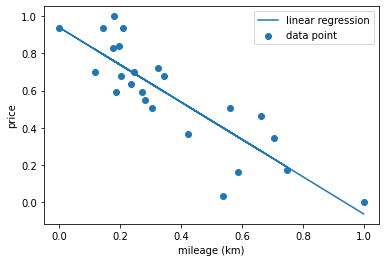

In [7]:
theta0, theta1 = linear_regression(x_scaled, y_scaled, m, 0, 0, 1.7, 1000, True)

Unscale theta0 and theta1

In [8]:
theta0 = theta0*(max(y)-min(y)) + min(y) + (theta1*min(x)*(min(y)-max(y)))/(max(x)-min(x))
theta1 = theta1*(max(y)-min(y)) / (max(x)-min(x))
theta0, theta1

(8499.599649933212, -0.021448963591702314)

Predict price using trained weights

In [9]:
price_predicted = theta0 + theta1 * x

Some of the most popular cost (loss or error) functions:
* Sum of Squared Residuals (SSR/SSE)
* Mean Squared Error (MSE)
* Root Mean Squared Error (RMSE)

## Ordinary Least Mean Square method

The line is the best fit that passes through most of the scatter points and also reduces error which is the distance from the point to the line itself:

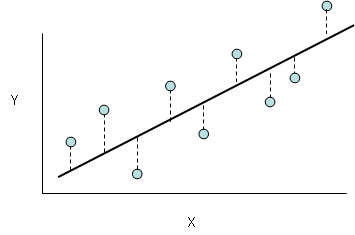

The total error of the linear model is the sum of the error of each point, squared due to some points would be above the line and some below:

$\sum\limits_{i=1}^n r_i^2$

$r_{i}$ - distance between the line and $i$*-th* point\
$n$ - total number of points

Minimize the error of the linear model by minimizing $r$:

$\theta_1=\frac{\sum\limits_{i=1}^n(x_i-\bar{x})\cdot(y_i-\bar{y})}{\sum\limits_{i=1}^n(x_i-\bar{x})^2}$\
$\theta_0=\bar{y}-\theta_1\cdot\bar{x}$

$\bar{x}$ - mean of the input variable $x$\
$\bar{y}$ - mean of the output variable $y$

This says that the slope is the sum of deviation cross products divided by the sum of squares for $x$.

In [10]:
numerator = 0
denominator = 0
x_mean = np.mean(x)
y_mean = np.mean(y)
for i in range(len(x)):
    numerator += (x[i] - x_mean) * (y[i] - y_mean)
    denominator += (x[i] - x_mean) ** 2    
theta1 = numerator / denominator
theta0 = y_mean - (theta1 * x_mean)
price_predicted = theta0 + theta1 * x
theta0, theta1

(8499.599649933216, -0.0214489635917023)

## Scikit-learn library solution

In [11]:
regression = LinearRegression()
regression.fit(df[['km']], y)
price_predicted = regression.predict(df[['km']])
theta0 = regression.intercept_
theta1 = regression.coef_[0]
theta0, theta1

(8499.599649933216, -0.0214489635917023)

## Plotting predicted model

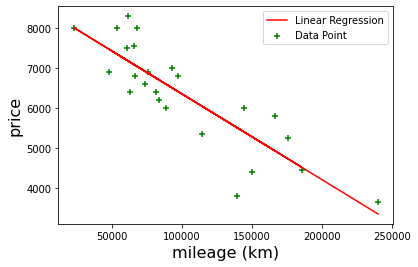

In [12]:
plt.ylabel('price', fontsize=16)
plt.xlabel('mileage (km)', fontsize=16)
plt.scatter(x, y, color='green', marker='+', label='Data Point')
plt.plot(x, price_predicted, color='red', label='Linear Regression')
plt.legend()
plt.show()

## Measuring model accuracy

**Root Mean Squared Error** method uses the square root of the sum of all errors divided by the number of values:

$RMSE=\sqrt{\frac{1}{n}\cdot\sum\limits_{j=1}^n(y_j-\hat{y}_j)^2}$

 $\hat{y_{j}}$ - $i$*-th* predicted output value

In [13]:
rmse = 0
for i in range(len(x)):
    y_pred = theta0 + theta1 * x[i]
    rmse += (y[i] - y_pred) ** 2
rmse = np.sqrt(rmse / len(x))
rmse

667.5666596462659

**Coefficient of Determination ($R^{2}$ Score)** method usually ranges from 0 to 1, or become negative if the model is completely wrong:

$R^2=\frac{SSR}{SST}=\frac{\sum(\hat{y}_i-\bar{y})^2}{\sum(y_i-\bar{y})^2}$

$SST$ - total sum of squares\
$SSR$ - total sum of squares of residuals (Sum of Squared Residuals)

In [14]:
sum_of_squares = 0
sum_of_residuals = 0
y_mean = np.mean(y)
for i in range(len(x)) :
    y_pred = theta0 + theta1 * x[i]
    sum_of_squares += (y[i] - y_mean) ** 2
    sum_of_residuals += (y[i] - y_pred) ** 2    
score  = 1 - (sum_of_residuals/sum_of_squares)
score

0.7329747078314965

The score can be improved by getting more datasets, improving the features, fit many models, etc.